In [71]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd 
from pandas import json_normalize 
import numpy as np 
import requests

In [11]:
pip install mplsoccer

     |████████████████████████████████| 78 kB 6.0 MB/s eta 0:00:011
     |████████████████████████████████| 7.4 MB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 6.6 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
Note: you may need to restart the kernel to use updated packages.


In [12]:
from mplsoccer.pitch import Pitch

In [72]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3869354.json')
events= events.json()

df=json_normalize(events, sep = "_")

In [14]:
pd.set_option("display.max.columns",None)

df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,out,under_pressure,duel_type_id,duel_type_name,clearance_aerial_won,clearance_head,clearance_body_part_id,clearance_body_part_name,off_camera,counterpress,duel_outcome_id,duel_outcome_name,pass_deflected,block_deflection,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,pass_switch,pass_cross,clearance_right_foot,pass_aerial_won,pass_inswinging,pass_technique_id,pass_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_goal_assist,shot_first_time,shot_aerial_won,pass_straight,ball_recovery_recovery_failure,dribble_nutmeg,clearance_left_foot,pass_cut_back,foul_won_defensive,foul_committed_card_id,foul_committed_card_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,ball_recovery_offensive,foul_committed_penalty,foul_won_penalty,shot_one_on_one,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,goalkeeper_punched_out,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain
0,f4aaba7a-6177-44f6-a0b4-aa4ecb6c6b8f,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,768,England,1,Regular Play,768,England,433.0,"[{'player': {'id': 3468, 'name': 'Jordan Pickf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55f454cb-e250-4f51-b97d-68e3a7a92289,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,768,England,1,Regular Play,771,France,4231.0,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3518fba5-71a8-4fb3-9ad9-b1f38065b426,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,768,England,1,Regular Play,771,France,NaN,NaN,[89051bd1-8b17-4391-9a85-31ca6ba3de37],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89051bd1-8b17-4391-9a85-31ca6ba3de37,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,768,England,1,Regular Play,768,England,NaN,NaN,[3518fba5-71a8-4fb3-9ad9-b1f38065b426],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [37]:
#Filtering shots made by France 

france_shots = df.loc[(df['type_name']== 'Shot') & (df['team_name'] == "France")]

#Filtering shots made by France 

england_shots = df.loc[(df['type_name']== 'Shot') & (df['team_name'] == "England")]

In [16]:
france_shots.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,out,under_pressure,duel_type_id,duel_type_name,clearance_aerial_won,clearance_head,clearance_body_part_id,clearance_body_part_name,off_camera,counterpress,duel_outcome_id,duel_outcome_name,pass_deflected,block_deflection,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,pass_switch,pass_cross,clearance_right_foot,pass_aerial_won,pass_inswinging,pass_technique_id,pass_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_goal_assist,shot_first_time,shot_aerial_won,pass_straight,ball_recovery_recovery_failure,dribble_nutmeg,clearance_left_foot,pass_cut_back,foul_won_defensive,foul_committed_card_id,foul_committed_card_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,ball_recovery_offensive,foul_committed_penalty,foul_won_penalty,shot_one_on_one,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,goalkeeper_punched_out,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain
385,76a926ab-d769-4f19-97da-d7d329d90325,386,1,00:10:35.259,10,35,22,0.868394,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[e3b85a3c-bc16-48a3-85d2-41749f5aa789],"[110.3, 38.2]",3604.0,Olivier Giroud,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215371,"[118.2, 40.1, 0.8]",168bcc6d-9c20-406c-8e20-6d8a4548083f,87.0,Open Play,100.0,Saved,90.0,Diving Header,37.0,Head,"[{'location': [107.6, 52.8], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,392c7c17-aff2-48c8-becc-d23b5bf60640,662,1,00:16:22.902,16,22,44,1.141540,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[797bfe7c-50ca-442c-92a9-53e6d27b2ab3],"[92.5, 43.5]",10481.0,Aurélien Djani Tchouaméni,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027870,"[120.0, 36.5, 0.8]",d13170eb-a5a7-496d-88ad-0481fd6302d3,87.0,Open Play,97.0,Goal,93.0,Normal,40.0,Right Foot,"[{'location': [118.9, 40.6], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,b9ca208b-744a-482c-acbb-a25025ebb258,1415,1,00:38:45.724,38,45,74,0.751028,16,Shot,771,France,3,From Free Kick,771,France,NaN,NaN,[40692c52-499c-4065-b959-9823111df719],"[107.9, 32.9]",3009.0,Kylian Mbappé Lottin,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067989,"[120.0, 40.1, 5.5]",b97c60fe-ccaf-4240-b0f8-ea84e305afac,87.0,Open Play,98.0,Off T,91.0,Half Volley,38.0,Left Foot,"[{'location'

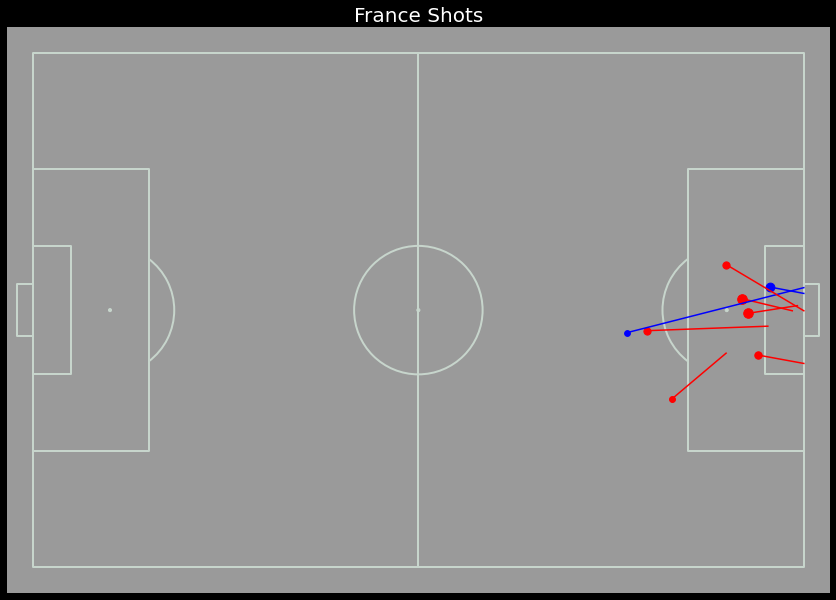

In [34]:
from mplsoccer.pitch import Pitch

fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(france_shots['id'])):
    if france_shots['period'].iloc[x] == 1 or france_shots['period'].iloc[x] == 2:
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x]) * 200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            ax.plot((france_shots['location'].iloc[x][0], france_shots['shot_end_location'].iloc[x][0]),
                    (france_shots['location'].iloc[x][1], france_shots['shot_end_location'].iloc[x][1]), color='blue')
            ax.scatter(france_shots['location'].iloc[x][0], france_shots['location'].iloc[x][1], s=size, color='blue')
        else:
            ax.plot((france_shots['location'].iloc[x][0], france_shots['shot_end_location'].iloc[x][0]),
                    (france_shots['location'].iloc[x][1], france_shots['shot_end_location'].iloc[x][1]), color='red')
            ax.scatter(france_shots['location'].iloc[x][0], france_shots['location'].iloc[x][1], s=size, color='red')

plt.title('France Shots', color='white', size=20)
plt.show()

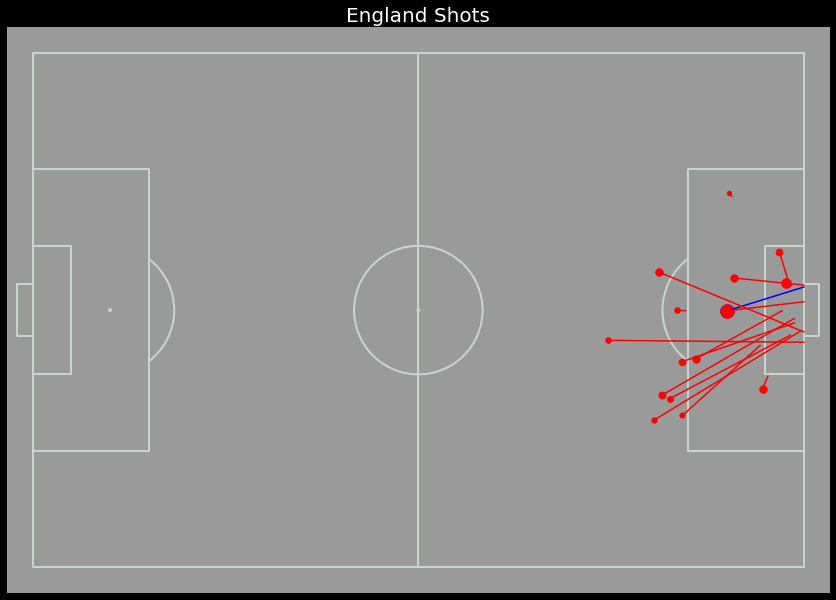

In [38]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_shots['id'])):
    if england_shots['period'].iloc[x] == 1 or england_shots['period'].iloc[x] == 2:
        size = np.sqrt(england_shots['shot_statsbomb_xg'].iloc[x]) * 200
        if england_shots['shot_outcome_name'].iloc[x] == 'Goal':
            ax.plot((england_shots['location'].iloc[x][0], england_shots['shot_end_location'].iloc[x][0]),
                    (england_shots['location'].iloc[x][1], england_shots['shot_end_location'].iloc[x][1]), color='blue')
            ax.scatter(england_shots['location'].iloc[x][0], england_shots['location'].iloc[x][1], s=size, color='blue')
        else:
            ax.plot((england_shots['location'].iloc[x][0], england_shots['shot_end_location'].iloc[x][0]),
                    (england_shots['location'].iloc[x][1], england_shots['shot_end_location'].iloc[x][1]), color='red')
            ax.scatter(england_shots['location'].iloc[x][0], england_shots['location'].iloc[x][1], s=size, color='red')

plt.title('England Shots', color='white', size=20)
plt.show() 

Text(0.5, 1.0, 'France Shots (left) vs England Shots (right)')

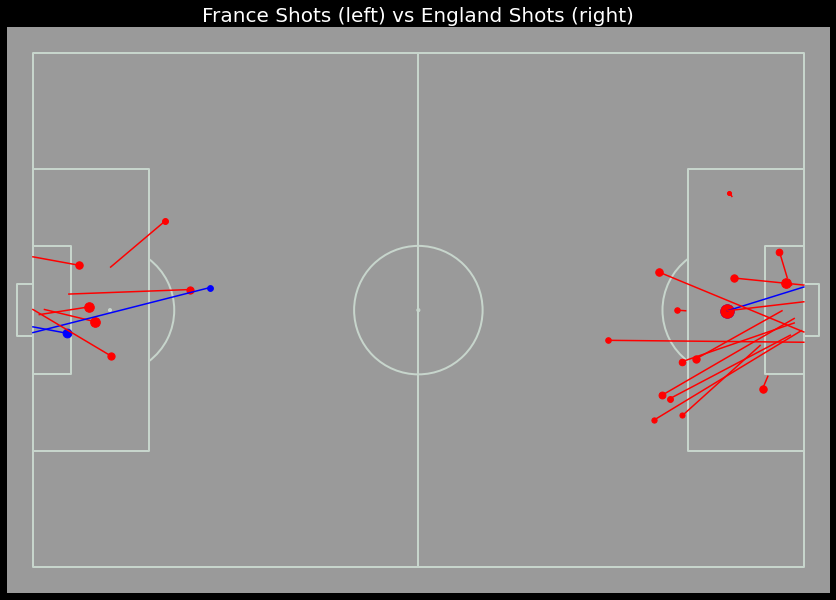

In [41]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_shots['id'])):
    if england_shots['period'].iloc[x] == 1 or england_shots['period'].iloc[x] == 2:
        size = np.sqrt(england_shots['shot_statsbomb_xg'].iloc[x]) * 200
        if england_shots['shot_outcome_name'].iloc[x] == 'Goal':
            plt.plot((england_shots['location'].iloc[x][0], england_shots['shot_end_location'].iloc[x][0]),\
                    (england_shots['location'].iloc[x][1], england_shots['shot_end_location'].iloc[x][1]), color='blue')
            plt.scatter(england_shots['location'].iloc[x][0], england_shots['location'].iloc[x][1], s=size, color='blue')
        else:
            plt.plot((england_shots['location'].iloc[x][0], england_shots['shot_end_location'].iloc[x][0]),\
                    (england_shots['location'].iloc[x][1], england_shots['shot_end_location'].iloc[x][1]), color='red')
            plt.scatter(england_shots['location'].iloc[x][0], england_shots['location'].iloc[x][1], s=size, color='red')

plt.title('England Shots', color='white', size=20)

for x in range(len(france_shots['id'])):
    if france_shots['period'].iloc[x] == 1 or france_shots['period'].iloc[x] == 2:
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x]) * 200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            plt.plot((120-france_shots['location'].iloc[x][0], 120-france_shots['shot_end_location'].iloc[x][0]),\
                    (80-france_shots['location'].iloc[x][1], 80-france_shots['shot_end_location'].iloc[x][1]), color='blue')
            plt.scatter(120-france_shots['location'].iloc[x][0], 80-france_shots['location'].iloc[x][1], s=size, color='blue')
        else:
            plt.plot((120-france_shots['location'].iloc[x][0], 120-france_shots['shot_end_location'].iloc[x][0]),\
                    (80-france_shots['location'].iloc[x][1], 80-france_shots['shot_end_location'].iloc[x][1]), color='red')
            plt.scatter(120-france_shots['location'].iloc[x][0], 80-france_shots['location'].iloc[x][1], s=size, color='red')

plt.title('France Shots (left) vs England Shots (right)', color='white', size=20)

In [42]:
#Filtering passes made by France 

france_passes = df.loc[(df['type_name']== 'Pass') & (df['team_name'] == "France")]

#Filtering passes made by France 

england_passes = df.loc[(df['type_name']== 'Pass') & (df['team_name'] == "England")]

Text(0.5, 1.0, 'Luke Shaw Passes')

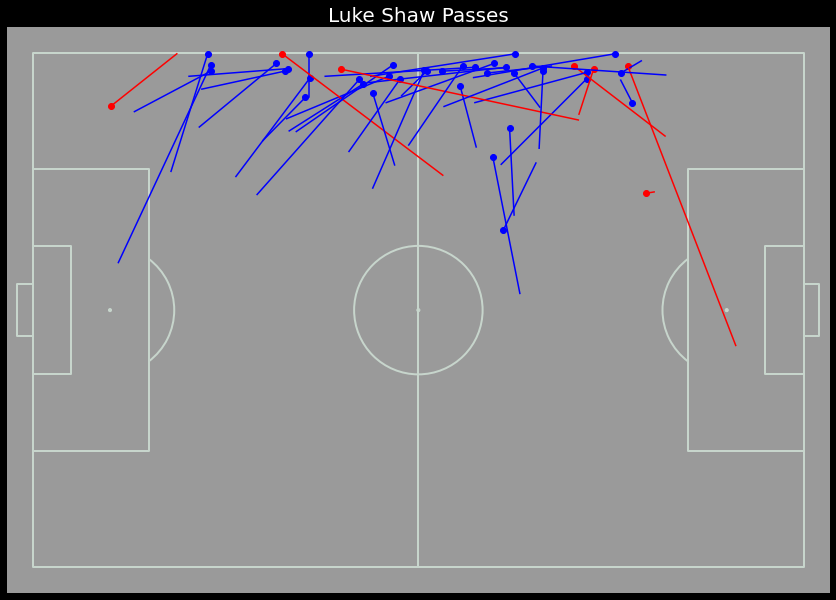

In [44]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if (england_passes['player_name'].iloc[x] == 'Luke Shaw') & (england_passes['period'].iloc[x] ==1):
        
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='red')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red')
        else:
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='blue')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1],color='blue')

plt.title('Luke Shaw Passes', color='white', size=20)



Text(0.5, 1.0, 'Declan Rice Passes')

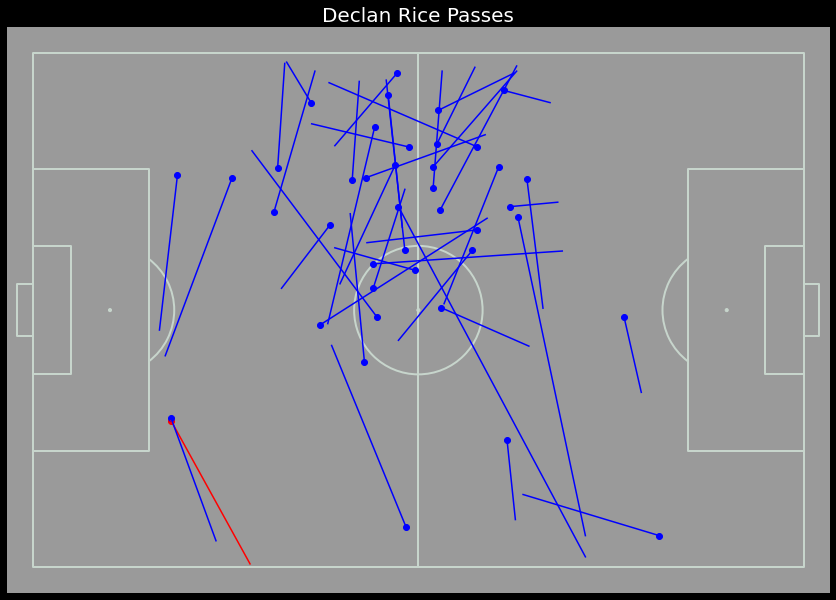

In [45]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if (england_passes['player_name'].iloc[x] == 'Declan Rice') & (england_passes['period'].iloc[x] ==1):
        
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='red')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red')
        else:
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='blue')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1],color='blue')

plt.title('Declan Rice Passes', color='white', size=20)



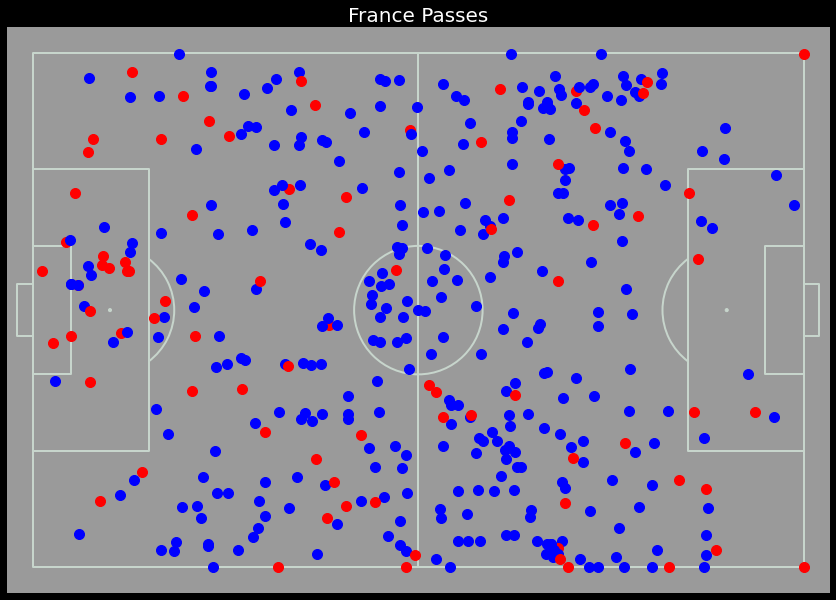

In [58]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(france_passes['id'])):
    if france_passes['period'].iloc[x] == 1 or france_passes['period'].iloc[x] == 2:
        if any([france_passes['pass_outcome_name'].iloc[x] == 'Incomplete', 
                france_passes['pass_outcome_name'].iloc[x] == 'Out',
                france_passes['pass_outcome_name'].iloc[x] == 'Unknown', 
                france_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                france_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            
            plt.scatter(france_passes['location'].iloc[x][0], france_passes['location'].iloc[x][1], color='red', s=100)
        else:
            # Code for what to do if the condition is not met
            # For example, you might add a blue scatter plot for other pass outcomes:
            plt.scatter(france_passes['location'].iloc[x][0], france_passes['location'].iloc[x][1], color='blue', s=100)

            
plt.title('France Passes',color='white',size=20) 
            
plt.show() 

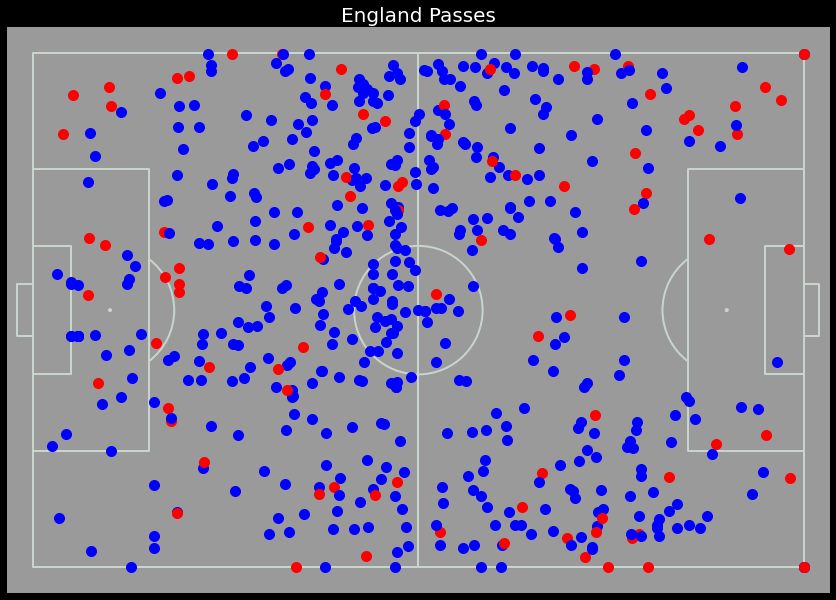

In [59]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if england_passes['period'].iloc[x] == 1 or england_passes['period'].iloc[x] == 2:
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', 
                england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', 
                england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red', s=100)
        else:
            # Code for what to do if the condition is not met
            # For example, you might add a blue scatter plot for other pass outcomes:
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='blue', s=100)

            
plt.title('England Passes',color='white',size=20) 
            
plt.show() 

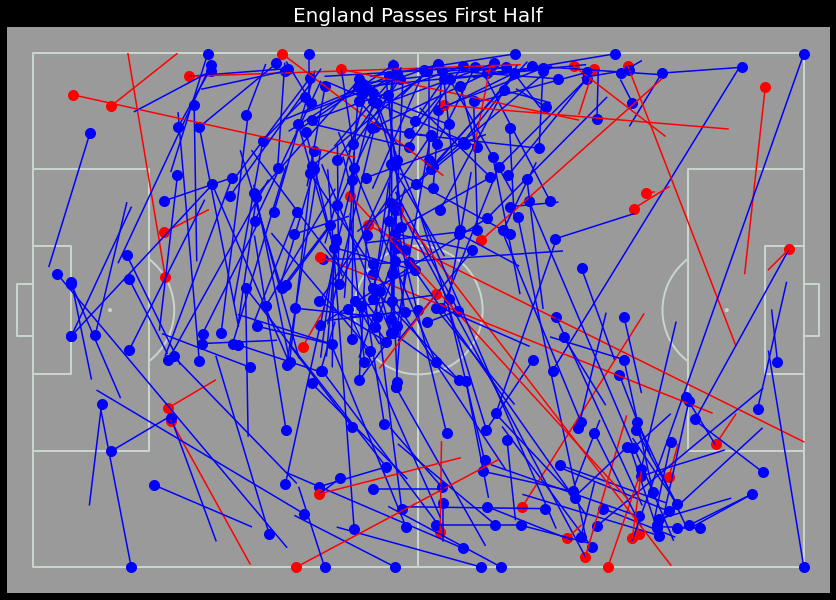

In [75]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if england_passes['period'].iloc[x] == 1: 
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', 
                england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', 
                england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            
            
            plt.plot((england_passes['location'].iloc[x][0],england_passes['pass_end_location'].iloc[x][0]),\
                     (england_passes['location'].iloc[x][1],england_passes['pass_end_location'].iloc[x][1]),color='red')
            
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red', s=100)
        else:
            plt.plot((england_passes['location'].iloc[x][0],england_passes['pass_end_location'].iloc[x][0]),\
                     (england_passes['location'].iloc[x][1],england_passes['pass_end_location'].iloc[x][1]),color='blue')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='blue', s=100)

            
plt.title('England Passes First Half',color='white',size=20) 
            
plt.show() 

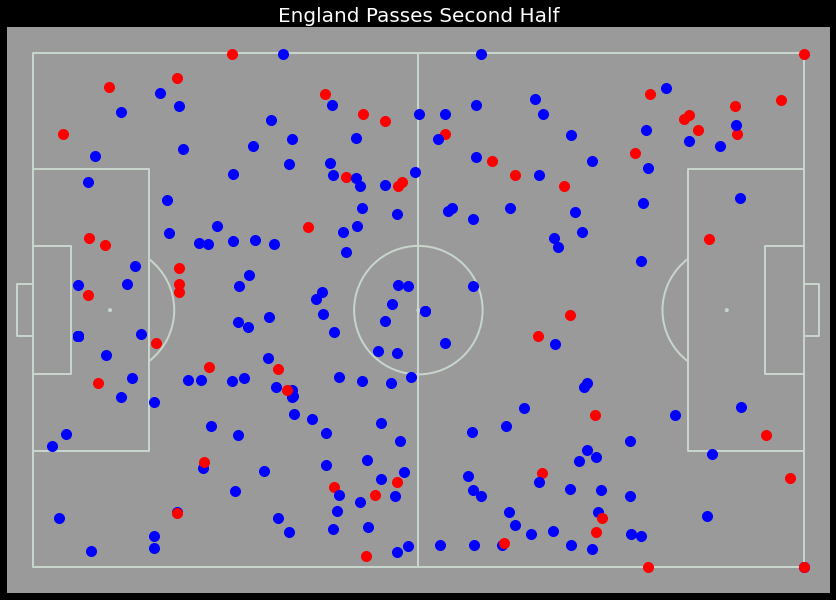

In [74]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if england_passes['period'].iloc[x] == 2: 
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', 
                england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', 
                england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red', s=100)
        else:
            # Code for what to do if the condition is not met
            # For example, you might add a blue scatter plot for other pass outcomes:
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='blue', s=100)

            
plt.title('England Passes Second Half',color='white',size=20) 
            
plt.show() 

Text(0.5, 1.0, 'Bukayo Saka Passes')

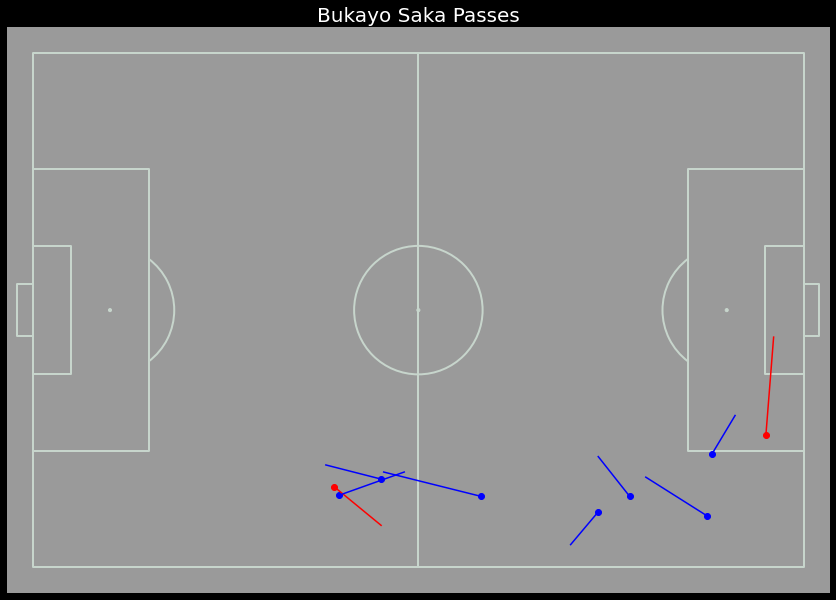

In [78]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#9A9A9A',
              line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(england_passes['id'])):
    if (england_passes['player_name'].iloc[x] == 'Bukayo Saka') & (england_passes['period'].iloc[x] ==1):
        
        if any([england_passes['pass_outcome_name'].iloc[x] == 'Incomplete', england_passes['pass_outcome_name'].iloc[x] == 'Out',
                england_passes['pass_outcome_name'].iloc[x] == 'Unknown', england_passes['pass_outcome_name'].iloc[x] == 'Pass Offside',
                england_passes['pass_outcome_name'].iloc[x] == 'Injury Clearance']):
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='red')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1], color='red')
        else:
            plt.plot((england_passes['location'].iloc[x][0], england_passes['pass_end_location'].iloc[x][0]),\
                    (england_passes['location'].iloc[x][1], england_passes['pass_end_location'].iloc[x][1]), color='blue')
            plt.scatter(england_passes['location'].iloc[x][0], england_passes['location'].iloc[x][1],color='blue')

plt.title('Bukayo Saka Passes', color='white', size=20)